In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Data set of recurrence plots

A recurrence plot is an image obtained from a time series, representing the
pairwise Euclidean distances for each value (and more generally for each
trajectory) in the time series.
The image can be binarized using a threshold.
It is implemented as :class:`pyts.image.RecurrencePlot`.

In this example, we consider the training samples of the
`GunPoint dataset <http://timeseriesclassification.com/description.php?Dataset=GunPoint>`_,
consisting of 50 univariate time series of length 150.
The recurrence plot of each time series is independently computed and the
50 recurrence plots are plotted.


In [2]:
DATA_PATH = 'raw_data.csv'

In [14]:
raw_data = pd.read_csv(
    DATA_PATH,
    index_col=0,
    usecols=[0, 1],
    parse_dates=True,
    dayfirst=False
)

raw_data.head(10)
cleaned_data = raw_data[raw_data['Volume'].notnull()]

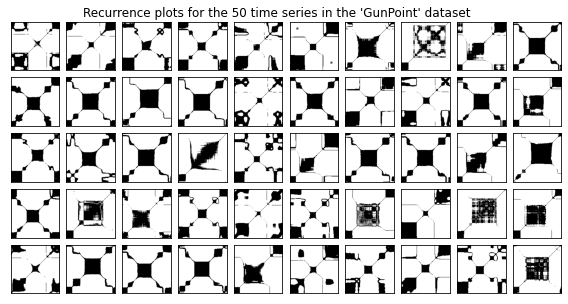

In [4]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

# Load the GunPoint dataset
X, _, _, _ = load_gunpoint(return_X_y=True)

# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

# Plot the 50 recurrence plots
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True)
for i, ax in enumerate(grid):
    ax.imshow(X_rp[i], cmap='binary', origin='lower')
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

fig.suptitle(
    "Recurrence plots for the 50 time series in the 'GunPoint' dataset",
    y=0.92
)

plt.show()